A kinetic zone diagram can be obtained by sweeping over two dimensionless parameters $\lambda = \frac{RT}{F} \frac{K_cC^{0}_{P}}{\nu}$ and $\gamma = \frac{C^{0}_{A}}{C^{0}_{P}}$ with the mechanism as $$ P +e = Q ,  Q + A --> P + B $$

In this example, we sample a response from the KZD of the above mentioned EC mechanism using $k_c$ and $C^{0}_{A}$ where we keep the values of $C^{0}_{A}, \nu$ as constants.

The KZD is defined for $\lambda \in (-3,4)$ and $\gamma \in (-3,4)$.

See the following article for a detailed explanation of kinetic zone diagram:
1. [Martin, Daniel J., et al. "Qualitative extension of the EC′ Zone Diagram to a molecular catalyst for a multi-electron, multi-substrate electrochemical reaction." Dalton Transactions 45.24 (2016): 9970-9976.](https://pubs.rsc.org/en/content/articlehtml/2016/dt/c6dt00302h)   
2. [Homogeneous redox catalysis of electrochemical reaction: Part VI. Zone diagram representation of the kinetic regimes](https://www.sciencedirect.com/science/article/abs/pii/0022072884801254)

3. [Lee, Katherine J., et al. "Electrochemical and spectroscopic methods for evaluating molecular electrocatalysts." Nature Reviews Chemistry 1.5 (2017): 1-14.](https://www.nature.com/articles/s41570-017-0039#Fig2)

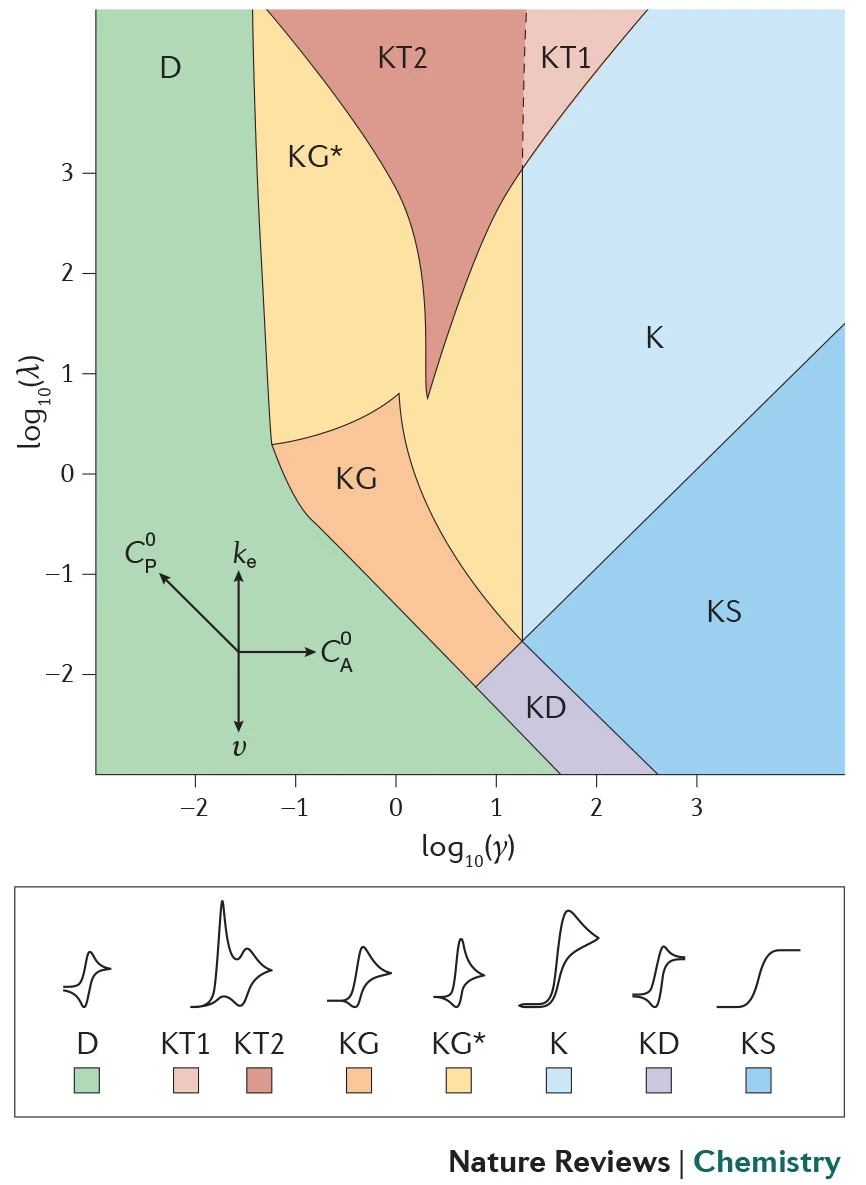

In [1]:
import numpy as np
from pymecsim import * 

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First lets build a mechanism and voltammetry experiment to simulate EC mechanism

P = Specie('P', C0=1e-6)
Q = Specie('Q')
A = Specie('A', C0='$C0A')
B = Specie('B')
species = [P, Q, A, B]

R1 = ChargeTransfer([(P,1),('e',1)],[(Q,1)],E0=0.0, ks=1.0e1)
R2 = ChemicalReaction([(Q,1),(A,1)],[(P,1),(B,1)], kf='$kc', kb=1e-5)

rxn = [R1, R2]

mech = Mechanism(rxn)
print(mech)

cv = DCVoltammetry(E_start = 0.5, E_rev=-0.5, nu=1.0e0)
volt = Voltammetry(objs=[cv])

exp = Experiment(mech, voltammetry=volt)

Charge Transfer : 1 P + 1 e <=> 1 Q  ks= 1.00e+01, E0 = 0.00e+00, alpha = 5.00e-01
Chemical Reaction : 1 Q + 1 A <=> 1 P + 1 B  kf= $kc, kb= 1.00e-05 



kc = 3.89E+10 	 C0A = 1.00E-05
log(lambda): 3.00 	 log(gamma): 1.00


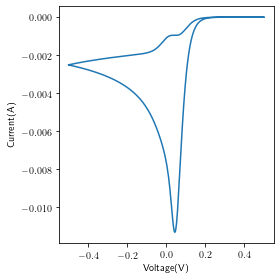

In [3]:
def sample_kzd(exp, log_lambda, log_gamma):
    """
    Utility function used to simulate a CV curve given a lambda and gamma (log values) 
    from the above kintic zone diagram
    
    CV plot would be inverted because of the voltage convention.
    """
    
    kc = (10**log_lambda)*(96485.3/(8.314*298))*(1/1e-6)
    C0A = 10**log_gamma*1e-6

    sim = MECSIM(exp=exp)
    sim.set_parameter('$kc',kc)
    sim.set_parameter('$C0A', C0A)
    sim.solve()
    
    _lambda = (8.314*298/96485.3) * (kc*1e-6)
    _gamma = C0A/1e-6
    
    print('kc = {:.2E} \t C0A = {:.2E}'.format(kc, C0A))
    print('log(lambda): {:.2f} \t log(gamma): {:.2f}'.format(np.log10(_lambda),np.log10(_gamma)))
    
    return sim.V, sim.I, sim

x_ref, y_ref, sim = sample_kzd(exp, 3, 1)
sim.plot()
plt.show()